In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
dados = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [ ]:
dados.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [ ]:
dados.shape

(133349, 11)

In [ ]:
linhas, colunas = dados.shape[0], dados.shape[1]
print("linhas:", linhas)
print("colunas:", colunas)

linhas: 133349
colunas: 11


In [ ]:
dados.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
dados.rename(columns={
    'work_year': 'ano',
    'experience_level': 'experiência',
    'employment_type': 'emprego',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'taxa_remota',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}, inplace=True)

In [ ]:
dados['experiência'] = dados['experiência'].map({
    'EN': 'Junior',
    'MI': 'Pleno',
    'SE': 'Sênior',
    'EX': 'Executivo'
})

dados['experiência'].value_counts()

experiência
Sênior       77241
Pleno        40465
Junior       12443
Executivo     3200
Name: count, dtype: int64

In [ ]:
dados['emprego'] = dados['emprego'].map({
    'FT': 'Tempo Integral',
    'PT': 'Tempo Parcial',
    'CT': 'Contrato',
    'FL': 'Freelancer'
})

dados['tamanho_empresa'] = dados['tamanho_empresa'].map({
    'S': 'Pequena',
    'M': 'Média',
    'L': 'Grande'
})

dados['moeda'] = dados['moeda'].map({
    'USD': 'Dólar Americano',
    'EUR': 'Euro',
    'GBP': 'Libra Esterlina',
    'INR': 'Rúpia Indiana',
    'CAD': 'Dólar Canadense',
    'AUD': 'Dólar Australiano',
    'SGD': 'Dólar Singapurense',
    'CHF': 'Franco Suíço',
    'SEK': 'Coroa Sueca',
    'NZD': 'Dólar Neozelandês',
    'HKD': 'Dólar de Hong Kong',
    'JPY': 'Iene Japonês',
    'MXN': 'Peso Mexicano',
    'BRL': 'Real Brasileiro',
    'ZAR': 'Rand Sul-Africano'
})


In [ ]:
dados['emprego'].value_counts()

emprego
Tempo Integral    132563
Contrato             394
Tempo Parcial        376
Freelancer            16
Name: count, dtype: int64

In [ ]:
dados['taxa_remota'].value_counts()

taxa_remota
0      105312
100     27718
50        319
Name: count, dtype: int64

In [ ]:
dados['taxa_remota'] = dados['taxa_remota'].map({
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
})

dados['taxa_remota'].value_counts()

taxa_remota
Presencial    105312
Remoto         27718
Híbrido          319
Name: count, dtype: int64

In [ ]:
dados['tamanho_empresa'].value_counts()

tamanho_empresa
Média      129561
Grande       3574
Pequena       214
Name: count, dtype: int64

In [ ]:
dados.describe(include='object')

,experiência,emprego,cargo,moeda,residencia,taxa_remota,empresa,tamanho_empresa
count,133349,133349,133349,133174,133349,133349,133349,133349
unique,4,4,390,15,102,3,95,3
top,Sênior,Tempo Integral,Data Scientist,Dólar Americano,US,Presencial,US,Média
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [ ]:
dados.head()

,ano,experiência,emprego,cargo,salario,moeda,usd,residencia,taxa_remota,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,Dólar Americano,214000,US,Remoto,US,Média
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,Dólar Americano,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,Dólar Americano,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,Dólar Americano,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,Dólar Americano,90000,US,Presencial,US,Média


In [ ]:
dados['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [ ]:
dados[(dados.isnull().any(axis=1)) & (dados['ano'].isnull())]

,ano,experiência,emprego,cargo,salario,moeda,usd,residencia,taxa_remota,empresa,tamanho_empresa
5588,NaN,Sênior,Tempo Integral,Product Manager,184500,Dólar Americano,184500,US,Presencial,US,Média
59692,NaN,Pleno,Tempo Integral,Engineer,110000,Dólar Americano,110000,DE,Presencial,DE,Média
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,Dólar Americano,208800,US,Presencial,US,Média
59759,NaN,Sênior,Tempo Integral,Software Engineer,135000,Dólar Americano,135000,US,Presencial,US,Média
59789,NaN,Sênior,Tempo Integral,Engineer,112000,Dólar Americano,112000,US,Presencial,US,Média
131000,NaN,Sênior,Tempo Integral,Machine Learning Engineer,163800,Dólar Americano,163800,US,Presencial,US,Média
131006,NaN,Sênior,Tempo Integral,Data Analytics Manager,204500,Dólar Americano,204500,US,Presencial,US,Média
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,Dólar Americano,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,NaN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,Dólar Americano,130000,US,Híbrido,US,Grande


In [ ]:
import numpy as np

dados_salarios = pd.DataFrame({
    "Nome" : ["Ana", "Richard", "Francisco", "Roberto", "Valdirene"],
    "Salário" : [4000, np.nan, 5000, np.nan, 100000]
})

#Calcula média, substitui valores nulos pela média arredondada
dados_salarios ['salário_media'] = dados_salarios['Salário'].fillna(dados_salarios["Salário"].mean().round())

'''Calcula mediana, substitui valores nulos pela mediana
'''

dados_salarios ['salário_mediana'] = dados_salarios['Salário'].fillna(dados_salarios["Salário"].median())

dados_salarios

,Nome,Salário,salário_media,salário_mediana
0,Ana,4000.0,4000.0,4000.0
1,Richard,NaN,36333.0,5000.0
2,Francisco,5000.0,5000.0,5000.0
3,Roberto,NaN,36333.0,5000.0
4,Valdirene,100000.0,100000.0,100000.0


In [ ]:
dados_limpos = dados.dropna()

dados_limpos.isnull().sum()

ano                0
experiência        0
emprego            0
cargo              0
salario            0
moeda              0
usd                0
residencia         0
taxa_remota        0
empresa            0
tamanho_empresa    0
dtype: int64

In [ ]:
dados_limpos.head()

,ano,experiência,emprego,cargo,salario,moeda,usd,residencia,taxa_remota,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,Dólar Americano,214000,US,Remoto,US,Média
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,Dólar Americano,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,Dólar Americano,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,Dólar Americano,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,Dólar Americano,90000,US,Presencial,US,Média


In [ ]:
dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133165 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133165 non-null  float64
 1   experiência      133165 non-null  object 
 2   emprego          133165 non-null  object 
 3   cargo            133165 non-null  object 
 4   salario          133165 non-null  int64  
 5   moeda            133165 non-null  object 
 6   usd              133165 non-null  int64  
 7   residencia       133165 non-null  object 
 8   taxa_remota      133165 non-null  object 
 9   empresa          133165 non-null  object 
 10  tamanho_empresa  133165 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [ ]:
dados_limpos = dados_limpos.assign (ano=dados_limpos['ano'].astype("int64"))
dados_limpos.head()

,ano,experiência,emprego,cargo,salario,moeda,usd,residencia,taxa_remota,empresa,tamanho_empresa
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,Dólar Americano,214000,US,Remoto,US,Média
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,Dólar Americano,136000,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,Dólar Americano,158800,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,Dólar Americano,139200,AU,Presencial,AU,Média
4,2025,Junior,Tempo Integral,Data Engineer,90000,Dólar Americano,90000,US,Presencial,US,Média


In [ ]:
dados_limpos = dados_limpos.assign (usd=dados_limpos['usd'].astype(float))
dados_limpos.head()

,ano,experiência,emprego,cargo,salario,moeda,usd,residencia,taxa_remota,empresa,tamanho_empresa
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,Dólar Americano,214000.0,US,Remoto,US,Média
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,Dólar Americano,136000.0,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800,Dólar Americano,158800.0,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200,Dólar Americano,139200.0,AU,Presencial,AU,Média
4,2025,Junior,Tempo Integral,Data Engineer,90000,Dólar Americano,90000.0,US,Presencial,US,Média


<Axes: title={'center': 'Experiência dos profissionais'}, xlabel='experiência'>

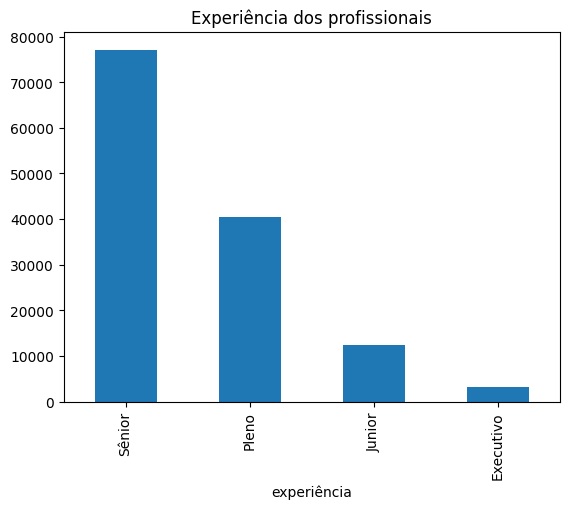

In [ ]:
dados_limpos['experiência'].value_counts().plot(kind='bar', title ="Experiência dos profissionais")

<Axes: xlabel='experiência', ylabel='usd'>

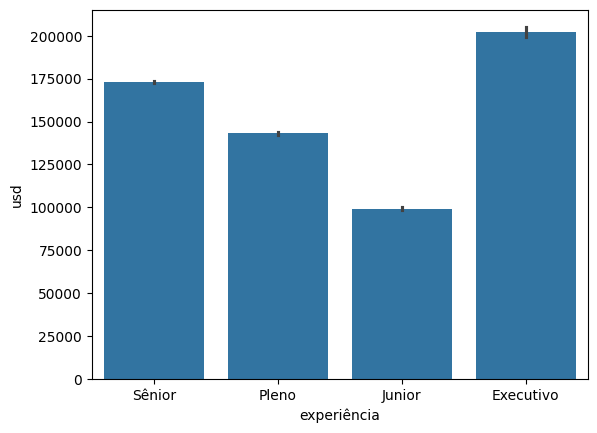

In [ ]:
import seaborn as sns
sns.barplot(data = dados_limpos, x = "experiência", y = "usd")


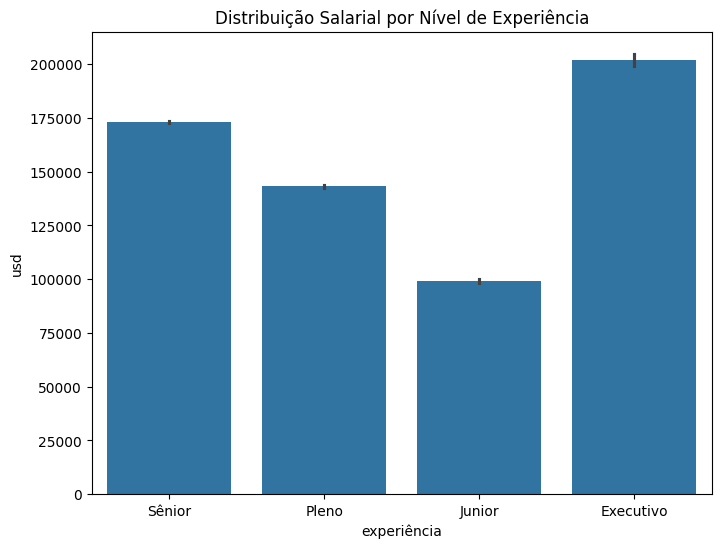

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data = dados_limpos, x = "experiência", y = "usd")
plt.title("Distribuição Salarial por Nível de Experiência")
plt.xlabel=("Nível de Experiência")
plt.ylabel=("Sálario médio anual (USD)")
plt.show()

In [ ]:
dados_limpos.groupby("experiência")["usd"].mean().sort_values(ascending=False)


experiência
Executivo    202059.431385
Sênior       172962.209602
Pleno        143170.948304
Junior        99245.052475
Name: usd, dtype: float64

In [ ]:
ordem = dados_limpos.groupby("experiência")["usd"].mean().sort_values(ascending=False).index

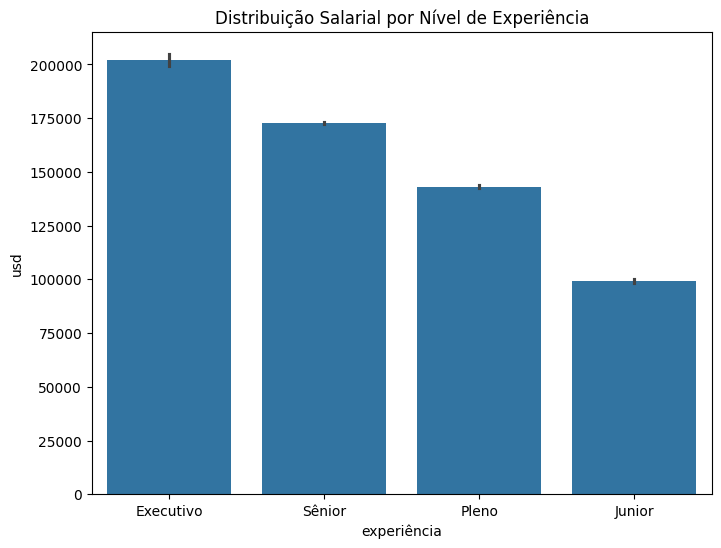

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data = dados_limpos, x = "experiência", y = "usd", order=ordem)
plt.title("Distribuição Salarial por Nível de Experiência")
plt.xlabel=("Nível de Experiência")
plt.ylabel=("Sálario médio anual (USD)")
plt.show()

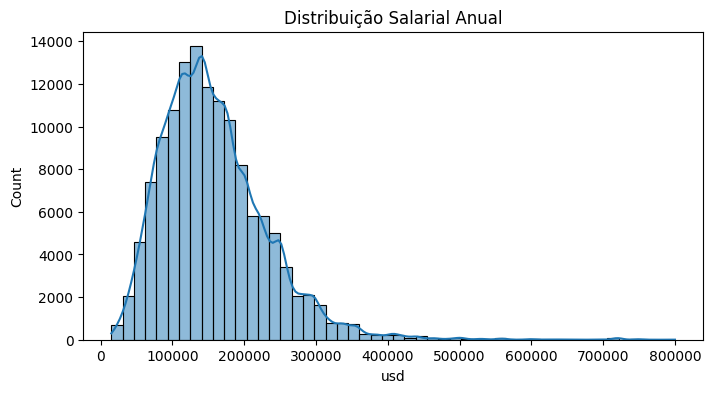

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(dados_limpos['usd'], bins=50, kde=True)
plt.title("Distribuição Salarial Anual")
plt.xlabel=("Sálario em USD")
plt.ylabel=("Frequência")
plt.show()

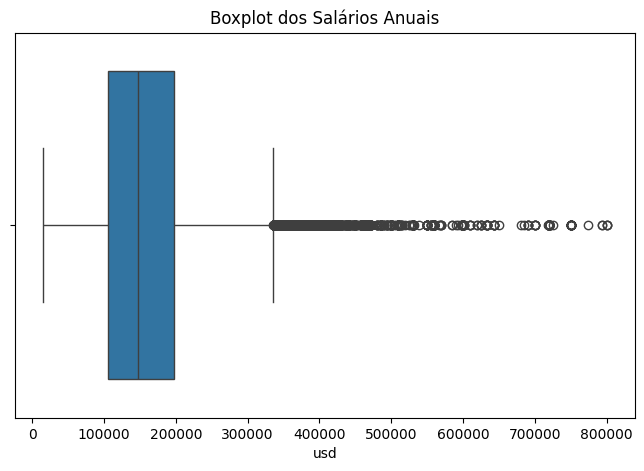

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=dados_limpos['usd'])
plt.title("Boxplot dos Salários Anuais")
plt.show()

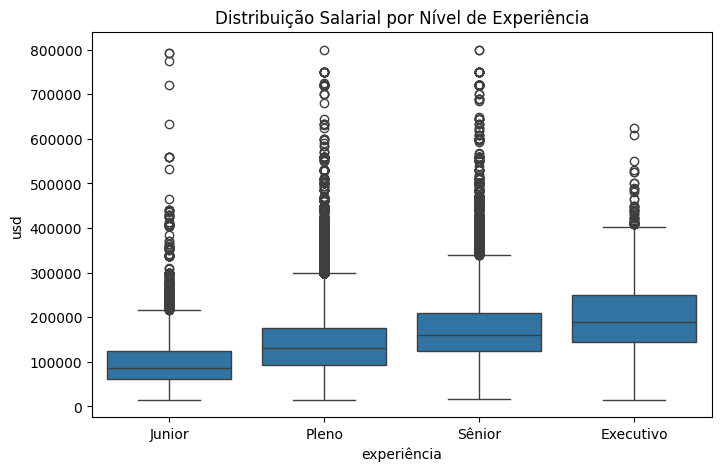

In [ ]:
ordem_experiencia = ['Junior', 'Pleno', 'Sênior', 'Executivo']
plt.figure(figsize=(8,5))
sns.boxplot(x='experiência', y='usd', data=dados_limpos, order=ordem_experiencia)
plt.title("Distribuição Salarial por Nível de Experiência")
plt.xlabel=("Nível de Experiência")
plt.ylabel=("Salário em USD")
plt.show()

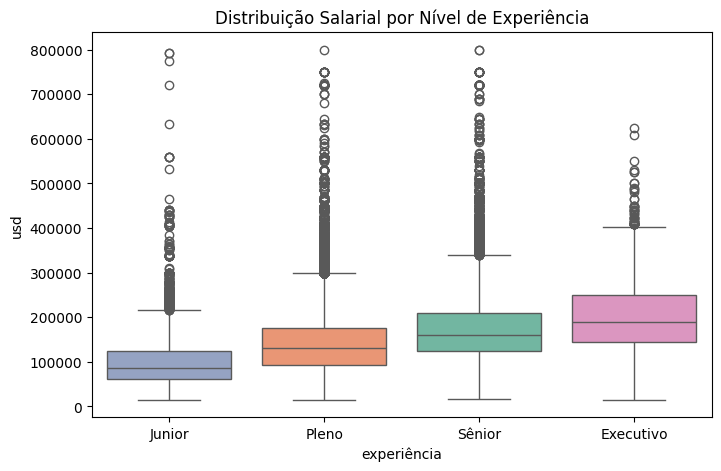

In [ ]:
ordem_experiencia = ['Junior', 'Pleno', 'Sênior', 'Executivo']
plt.figure(figsize=(8,5))
sns.boxplot(x='experiência', y='usd', data=dados_limpos, order=ordem_experiencia, palette="Set2", hue="experiência")
plt.title("Distribuição Salarial por Nível de Experiência")
plt.xlabel=("Nível de Experiência")
plt.ylabel=("Salário em USD")
plt.show()

In [ ]:
import plotly.express as px
fig = px.bar(dados_limpos.groupby("experiência")["usd"].mean().reset_index(),
             x="experiência",
             y="usd",
             title="Média Salarial por Nível de Experiência",
             labels={"experiência": "Nível de Experiência", "usd": "Salário Médio (USD)"},
             category_orders={"experiência": ordem_experiencia})

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed